In [18]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [4]:
def gen_results(df, sorted_data):
    df["error"] = df.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    df["rerror"] = df["error"] / np.minimum(df["q"],(1-df["q"]))
    
    return df

In [92]:
df = pd.read_csv("../javamsketch/results/moments_acc_milan_1515110195.csv")
orig_df = pd.read_csv("../sampledata/l_internet-mi-2013-11-01_09.csv")
orig_data = orig_df["l_internet"]
sorted_data = np.sort(orig_data)

In [93]:
res = gen_results(df, sorted_data)

In [94]:
print(res['error'].mean())
print(res['bound_size'].mean())

0.00398334738438
0.162683428571


In [95]:
df = pd.read_csv("../javamsketch/results/moments_acc_gaussian_1515109926.csv")
orig_data = pd.read_csv("../sampledata/norm_outlier.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())

0.000161476029
0.219888190476


In [96]:
df = pd.read_csv("../javamsketch/results/moments_acc_occupancy_1515109931.csv")
orig_data = pd.read_csv("../sampledata/occupancy_2.csv", usecols=[3])["CO2"]
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())

0.0132226236798
0.166722761905


In [97]:
df = pd.read_csv("../javamsketch/results/moments_acc_hepmass_1515117960.csv")
orig_data = pd.read_csv("../sampledata/hepmass_firstcol.csv", usecols=[0])['f0']
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())

0.000234095238095
0.15188


In [60]:
df1 = pd.read_csv('~/Downloads/all_train.csv', usecols=[1])
df2 = pd.read_csv('~/Downloads/all_test.csv', usecols=[1])
df3 = df1.append(df2)
df3.to_csv('~/msketch/sampledata/hepmass_firstcol.csv', index=False)

# Sampling

In [45]:
sketches = ["moment", "sampling"]
sizes = [10, 30, 100, 300]

In [42]:
def gen_plots(df, sorted_data):
    dft = df.groupby(
        ["sketch", "size_param", "q"]
    )[
        "quantile_estimate", "train_time", 
        "query_time", "space",
        "bound_size"
    ].mean()
    dft = dft.reset_index()
    
    dft["error"] = dft.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
    dfg = dft.groupby([
        "sketch", "size_param"
    ])["train_time", "query_time", "space", "error", "rerror", "bound_size"].mean()
    dfs = dfg.reset_index().sort_values(["size_param"])
    
    plt.figure()
    df_m = dft[(dft["sketch"] == "moment")]
    plt.plot(df_m["q"], df_m["error"], label="moment")
    for size in sizes:
        df_m = dft[(dft["sketch"] == "sampling") & (dft["size_param"] == size)]
        plt.plot(df_m["q"], df_m["error"], label="sampling {}".format(size))
    plt.legend()
    plt.show()
    
    df_m = dft[(dft["sketch"] == "moment")]
    plt.plot(df_m["q"], df_m["bound_size"], label="moment")
    for size in sizes:
        df_m = dft[(dft["sketch"] == "sampling") & (dft["size_param"] == size)]
        plt.plot(df_m["q"], df_m["bound_size"], label="sampling {}".format(size))
    plt.legend()
    plt.show()
    
    return dfs

0.0544796717108
0.196836321429


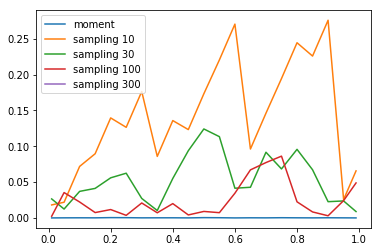

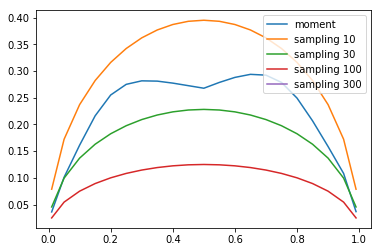

     sketch  size_param  train_time  query_time  space     error    rerror  \
1  sampling        10.0    62719461    21416045     88  0.139424  1.039819   
0    moment        11.0    36284506   554773951    104  0.000161  0.000951   
2  sampling        30.0    70346380      453133    248  0.053428  0.398057   
3  sampling       100.0    34998804      249346    808  0.024905  0.376922   

   bound_size  
1    0.299675  
0    0.219888  
2    0.173017  
3    0.094765  


In [46]:
df = pd.read_csv("../javamsketch/results/moments_sampling_acc_gaussian_1515612515.csv")
orig_data = pd.read_csv("../sampledata/norm_outlier.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())
print(gen_plots(df, sorted_data))

0.0381067259589
0.157778552381


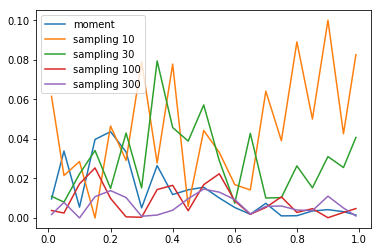

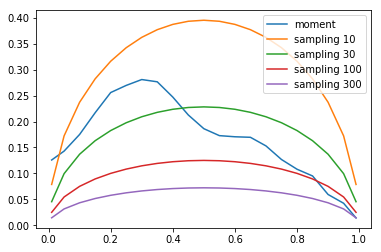

     sketch  size_param  train_time  query_time   space     error    rerror  \
1  sampling        10.0   2420539.6   1988799.4    88.0  0.045396  0.917411   
0    moment        11.0   1039352.8  34742311.6   104.0  0.013223  0.135424   
2  sampling        30.0   3268938.2    235082.0   248.0  0.028942  0.378400   
3  sampling       100.0   1722929.8    378000.0   808.0  0.008312  0.078640   
4  sampling       300.0   1995805.6    428496.4  2408.0  0.006467  0.049266   

   bound_size  
1    0.299675  
0    0.166723  
2    0.173017  
3    0.094765  
4    0.054713  


In [47]:
df = pd.read_csv("../javamsketch/results/moments_sampling_acc_occupancy_1516040050.csv")
orig_data = pd.read_csv("../sampledata/occupancy_2.csv", usecols=[3])["CO2"]
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())
print(gen_plots(df, sorted_data))

0.0420215171944
0.182535130952


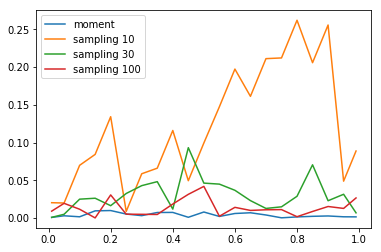

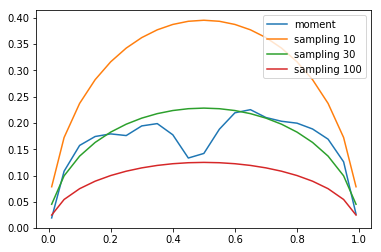

     sketch  size_param  train_time  query_time  space     error    rerror  \
1  sampling        10.0  1108092899    22806297     88  0.119886  1.109313   
0    moment        11.0   345328234   273520931    104  0.003983  0.029192   
2  sampling        30.0   848205736      285896    248  0.030449  0.186708   
3  sampling       100.0   733646341      227302    808  0.013768  0.241602   

   bound_size  
1    0.299675  
0    0.162683  
2    0.173017  
3    0.094765  


In [39]:
df = pd.read_csv("../javamsketch/results/moments_sampling_acc_milan_1515613741.csv")
orig_df = pd.read_csv("../sampledata/l_internet-mi-2013-11-01_09.csv")
orig_data = orig_df["l_internet"]
sorted_data = np.sort(orig_data)
res = gen_results(df, sorted_data)
print(res['error'].mean())
print(res['bound_size'].mean())
print(gen_plots(df, sorted_data))